<a href="https://colab.research.google.com/github/MYElmasry/DBSCAN-VS-KMeans/blob/main/DBSCAN_VS_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Libraries
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
from scipy.spatial import ConvexHull

In [ ]:
X, _ = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=0, cluster_std=0.25)
X.shape

(1000, 2)

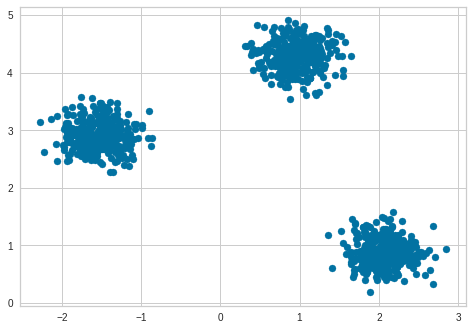

In [ ]:
#plot the data
plt.scatter(X[:,0], X[:,1])
plt.show()

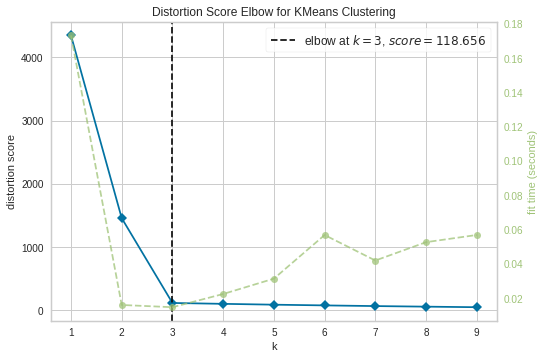

In [ ]:
#elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

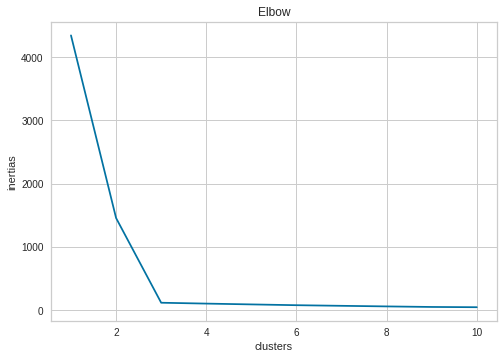

In [ ]:
ilist = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)
  
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

In [ ]:
#apply kmeans
kmeans = KMeans(n_clusters=3)
results = kmeans.fit_predict(X)

In [ ]:
#cluster centers of kmeans
clusters = kmeans.cluster_centers_
clusters

array([[-1.53641556,  2.92618836],
       [ 2.07338302,  0.89021751],
       [ 0.94679786,  4.29174638]])

In [ ]:
X[:10]

array([[-1.34698697,  2.85577743],
       [ 1.21379218,  4.26594803],
       [-1.52021942,  2.96374482],
       [-1.42244059,  2.90787758],
       [-1.77798469,  2.66833433],
       [ 1.85810021,  1.17132325],
       [ 0.54068103,  3.97797664],
       [ 0.54970253,  4.79148118],
       [ 2.03398862,  0.7565884 ],
       [ 1.3060543 ,  4.08318262]])

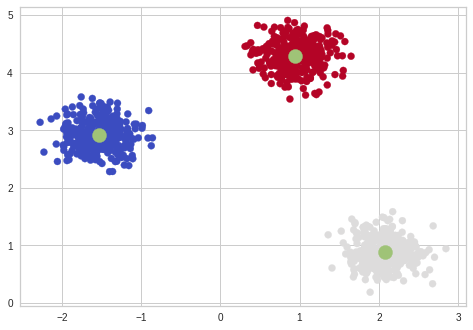

In [ ]:
plt.scatter(X[:,0], X[:,1], c=results, cmap="coolwarm")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'g')
plt.show()

In [39]:
cluster0 =[]
cluster1 =[]
cluster2 =[]
for i in range(len(X)):
  if results[i] == 0:
    cluster0.append(list(X[i]))
  elif results[i] == 1:
    cluster1.append(list(X[i]))
  else:
    cluster2.append(list(X[i]))
cluster0 = np.array(cluster0)
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)

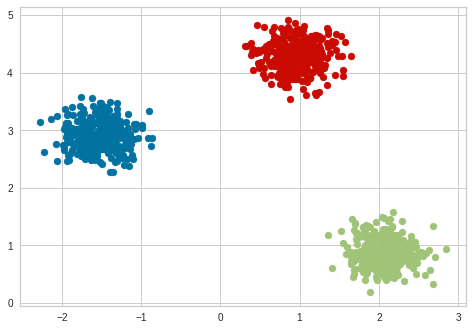

In [45]:
plt.scatter(cluster0[:,0], cluster0[:,1])
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1])
plt.show()

In [71]:
dbscan0 = DBSCAN(eps=1, min_samples=3)
dbscan0.fit(cluster0)
dbscan1 = DBSCAN(eps=1, min_samples=3)
dbscan1.fit(cluster1)
dbscan2 = DBSCAN(eps=1, min_samples=3)
dbscan2.fit(cluster2)

DBSCAN(eps=1, min_samples=3)

In [72]:
dbscan0.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

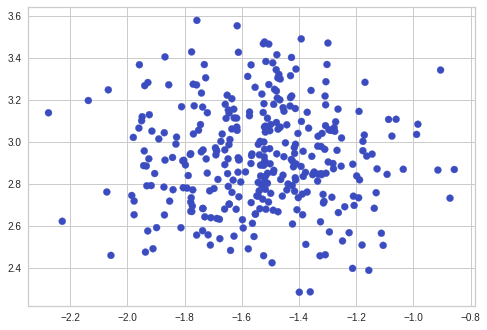

In [73]:
plt.scatter(cluster0[:,0],cluster0[:,1], c=dbscan0.labels_, cmap="coolwarm")
plt.show()

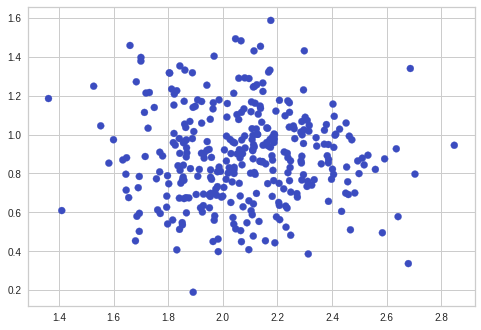

In [74]:
plt.scatter(cluster1[:,0],cluster1[:,1], c=dbscan1.labels_, cmap="coolwarm")
plt.show()

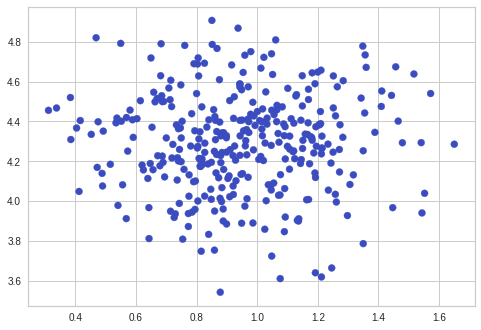

In [75]:
plt.scatter(cluster2[:,0],cluster2[:,1], c=dbscan2.labels_, cmap="coolwarm")
plt.show()

In [76]:
dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

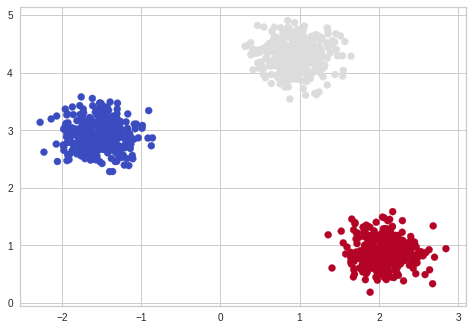

In [78]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap="coolwarm")
plt.show()

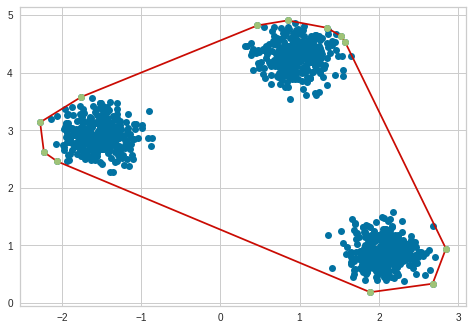

In [ ]:
hull = ConvexHull(X)
plt.plot(X[:,0], X[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'r')
plt.plot(X[hull.vertices, 0], X[hull.vertices, 1], 'o', lw=2)
plt.show()

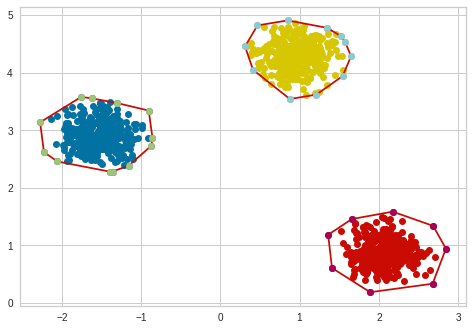

In [86]:
hull = ConvexHull(cluster0)
plt.plot(cluster0[:,0], cluster0[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster0[simplex, 0], cluster0[simplex, 1], 'r')
plt.plot(cluster0[hull.vertices, 0], cluster0[hull.vertices, 1], 'o', lw=2)
hull = ConvexHull(cluster1)
plt.plot(cluster1[:,0], cluster1[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster1[simplex, 0], cluster1[simplex, 1], 'r')
plt.plot(cluster1[hull.vertices, 0], cluster1[hull.vertices, 1], 'o', lw=2)
hull = ConvexHull(cluster2)
plt.plot(cluster2[:,0], cluster2[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster2[simplex, 0], cluster2[simplex, 1], 'r')
plt.plot(cluster2[hull.vertices, 0], cluster2[hull.vertices, 1], 'o', lw=2)
plt.show()

In [87]:
X, _ = make_circles(n_samples=1000)
X.shape

(1000, 2)

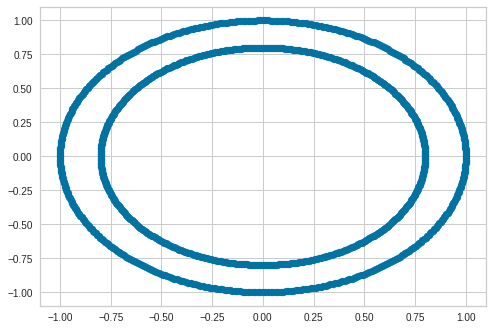

In [88]:
#plot the data
plt.scatter(X[:,0], X[:,1])
plt.show()

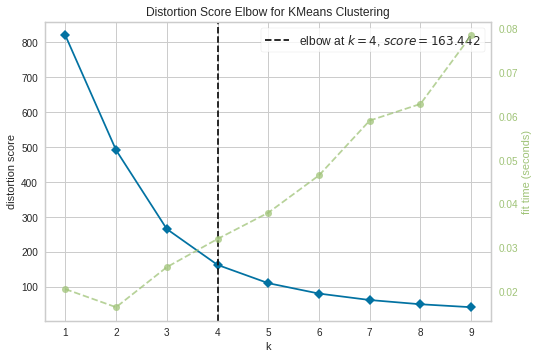

In [89]:
#elbow method
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.show()

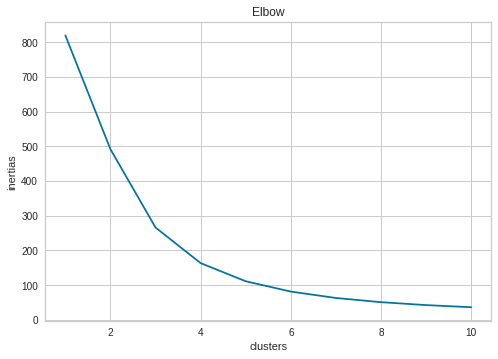

In [90]:
ilist = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    ilist.append(kmeans.inertia_)
  
plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

In [91]:
#apply kmeans
kmeans = KMeans(n_clusters=4)
results = kmeans.fit_predict(X)

In [92]:
#cluster centers of kmeans
clusters = kmeans.cluster_centers_
clusters

array([[ 0.53202488,  0.61116236],
       [-0.53966277, -0.60442866],
       [ 0.60676037, -0.53493123],
       [-0.60884735,  0.53677114]])

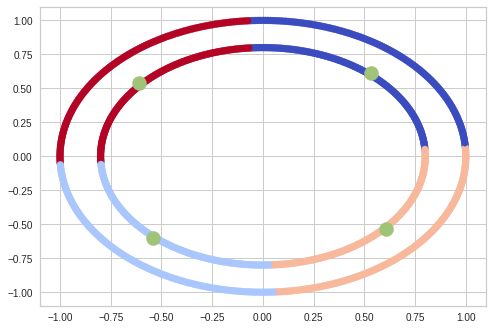

In [94]:
plt.scatter(X[:,0], X[:,1], c=results, cmap="coolwarm")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'g')
plt.show()

In [95]:
cluster0 =[]
cluster1 =[]
cluster2 =[]
cluster3 =[]
for i in range(len(X)):
  if results[i] == 0:
    cluster0.append(list(X[i]))
  elif results[i] == 1:
    cluster1.append(list(X[i]))
  elif results[i] == 2:
    cluster2.append(list(X[i]))
  else:
    cluster3.append(list(X[i]))
cluster0 = np.array(cluster0)
cluster1 = np.array(cluster1)
cluster2 = np.array(cluster2)
cluster3 = np.array(cluster3)

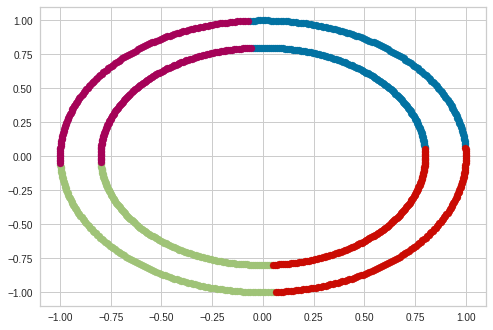

In [96]:
plt.scatter(cluster0[:,0], cluster0[:,1])
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1])
plt.scatter(cluster3[:,0], cluster3[:,1])
plt.show()

In [100]:
dbscan0 = DBSCAN(eps=0.1, min_samples=3)
dbscan0.fit(cluster0)
dbscan1 = DBSCAN(eps=0.1, min_samples=3)
dbscan1.fit(cluster1)
dbscan2 = DBSCAN(eps=0.1, min_samples=3)
dbscan2.fit(cluster2)
dbscan3 = DBSCAN(eps=0.1, min_samples=3)
dbscan3.fit(cluster3)

DBSCAN(eps=0.1, min_samples=3)

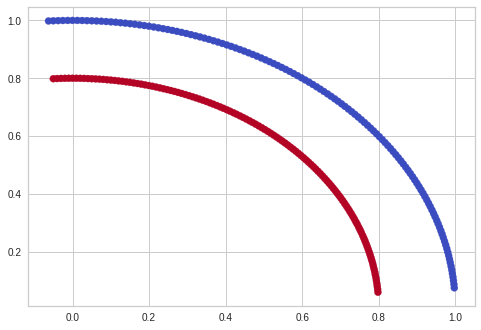

In [101]:
plt.scatter(cluster0[:,0],cluster0[:,1], c=dbscan0.labels_, cmap="coolwarm")
plt.show()

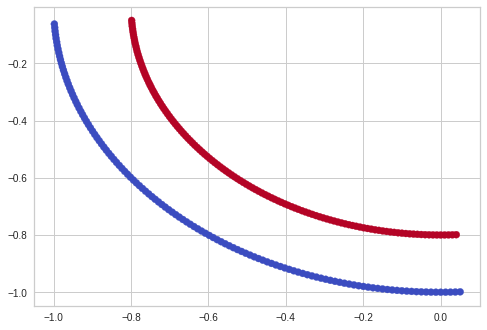

In [102]:
plt.scatter(cluster1[:,0],cluster1[:,1], c=dbscan1.labels_, cmap="coolwarm")
plt.show()

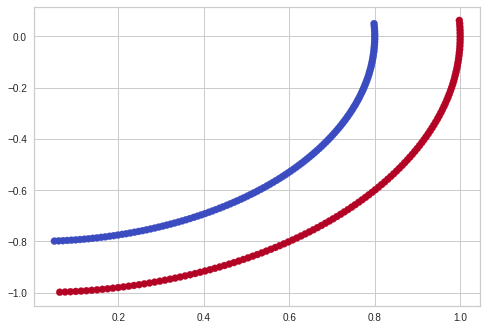

In [103]:
plt.scatter(cluster2[:,0],cluster2[:,1], c=dbscan2.labels_, cmap="coolwarm")
plt.show()

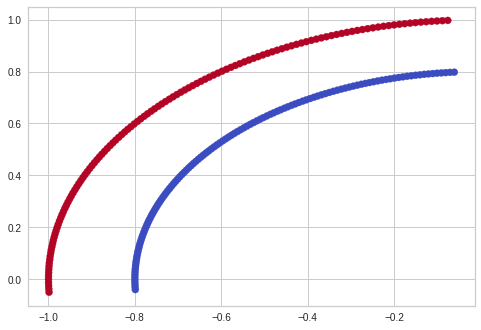

In [104]:
plt.scatter(cluster3[:,0],cluster3[:,1], c=dbscan3.labels_, cmap="coolwarm")
plt.show()

In [105]:
dbscan = DBSCAN(eps=0.1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=0.1, min_samples=3)

In [106]:
dbscan.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

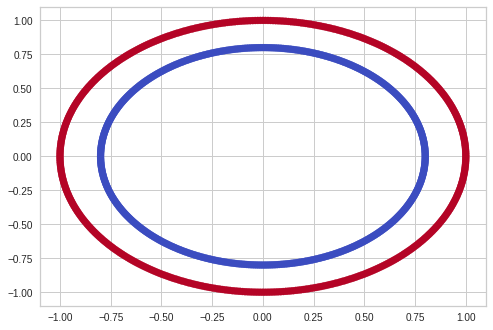

In [107]:
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_, cmap="coolwarm")
plt.show()

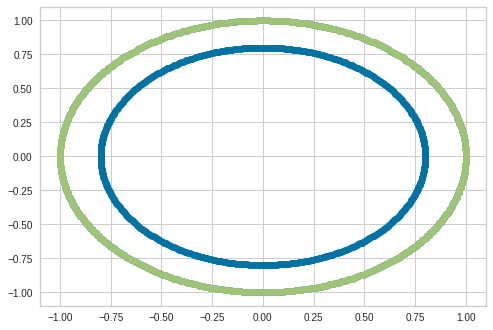

In [ ]:
hull = ConvexHull(X)
plt.plot(X[:,0], X[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(X[simplex, 0], X[simplex, 1], 'c')
plt.plot(X[hull.vertices, 0], X[hull.vertices, 1], 'o', lw=2)
plt.show()

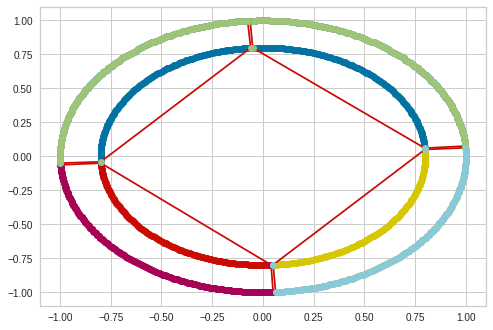

In [108]:
hull = ConvexHull(cluster0)
plt.plot(cluster0[:,0], cluster0[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster0[simplex, 0], cluster0[simplex, 1], 'r')
plt.plot(cluster0[hull.vertices, 0], cluster0[hull.vertices, 1], 'o', lw=2)
hull = ConvexHull(cluster1)
plt.plot(cluster1[:,0], cluster1[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster1[simplex, 0], cluster1[simplex, 1], 'r')
plt.plot(cluster1[hull.vertices, 0], cluster1[hull.vertices, 1], 'o', lw=2)
hull = ConvexHull(cluster2)
plt.plot(cluster2[:,0], cluster2[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster2[simplex, 0], cluster2[simplex, 1], 'r')
plt.plot(cluster2[hull.vertices, 0], cluster2[hull.vertices, 1], 'o', lw=2)
hull = ConvexHull(cluster3)
plt.plot(cluster3[:,0], cluster3[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(cluster3[simplex, 0], cluster3[simplex, 1], 'r')
plt.plot(cluster3[hull.vertices, 0], cluster3[hull.vertices, 1], 'o', lw=2)
plt.show()